# Exploring results (FA maps) - just age and educyears

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
paramtype = 'FA'
analysis_name='dm_%s_linearage_and_educyears'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20170116/', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmat/%s.xls'%analysis_name
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20170116/dm_FA_linearage_and_educyears/estimatecontrasts/SPM.mat']


In [4]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmat/dm_FA_linearage_and_educyears.xls looking up column FA ...
Analysis name: dm_FA_linearage_and_educyears
First column: FA
Columns in the model: [u'Apoe2-3', u'Apoe2-4', u'Apoe3-3', u'Apoe3-4', u'Apoe4-4', u'age', u'gender', u'educyears']
### Linearage and educyears model identified ###
Analysis name: dm_FA_linearage_and_educyears
Scans (514): [u'/home/grg/spm/FA/10070_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10102_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10108_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10235_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10365_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10419_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10463_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10530_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10551_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10563_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10576_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10630_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10668_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10692_FA_MNIspace_s

,contrast name,contrast type,covariate names,covariate weights
0,Effect Age,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
1,Effect Gender,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,Effect Educational Years,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"


/home/grg/spm/analysis_20170116/dm_FA_linearage_and_educyears/estimatecontrasts/spmT_0001.nii T
/home/grg/spm/analysis_20170116/dm_FA_linearage_and_educyears/estimatecontrasts/spmT_0002.nii T
/home/grg/spm/analysis_20170116/dm_FA_linearage_and_educyears/estimatecontrasts/spmT_0003.nii T


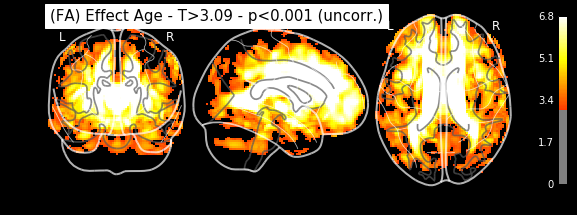

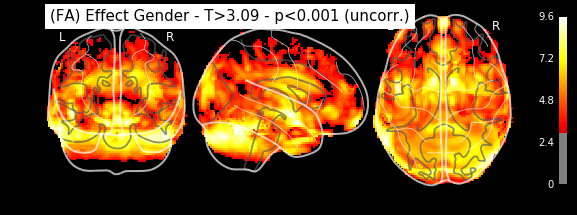

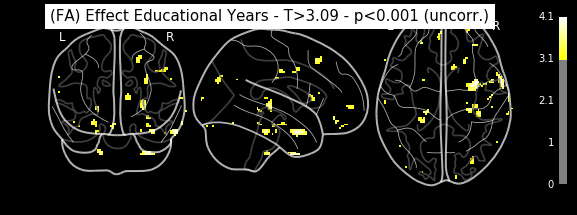

In [24]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(1, len(n3.inputs.contrasts)+1):
    img = glob(osp.join(analysis_wd, 'estimatecontrasts/spm*_00%02d.nii'%i))[0]
    contrast_type = osp.split(img)[-1][3]
    print img, contrast_type
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)
    plotting.plot_glass_brain(img,
                      title='(%s) %s - %s>%.02f - p<0.001 (uncorr.)'%(paramtype, contrast_name, contrast_type, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis_20170116/dm_FA_linearage_and_educyears/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpKQcQnb.png
/home/grg/spm/analysis_20170116/dm_FA_linearage_and_educyears/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpAZzaxx.png
/home/grg/spm/analysis_20170116/dm_FA_linearage_and_educyears/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmppwTOtM.png


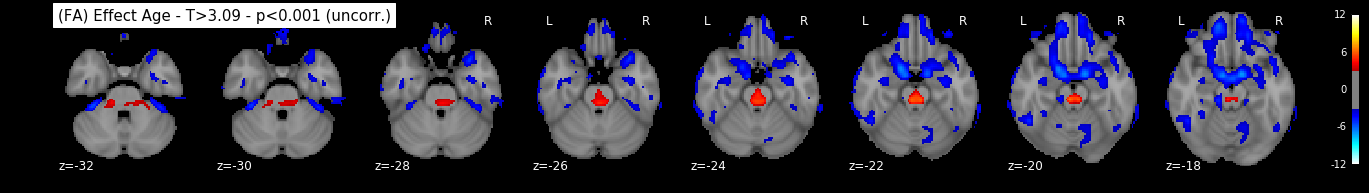

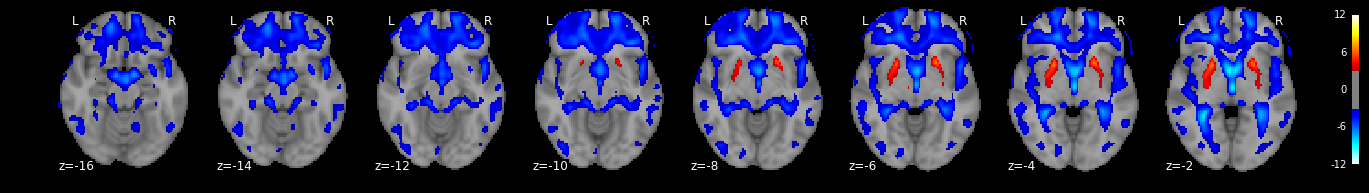

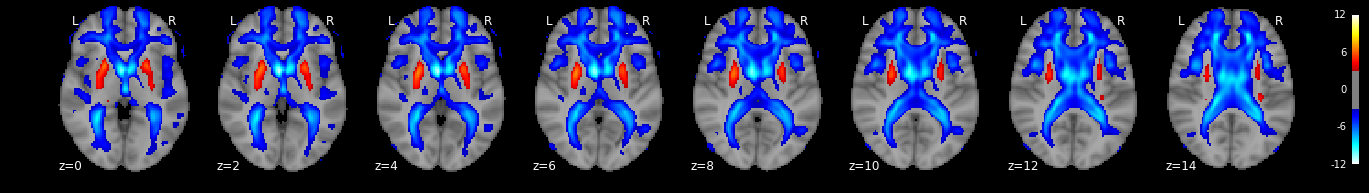

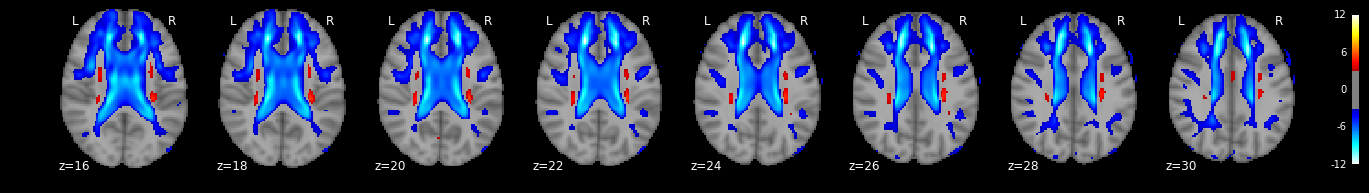

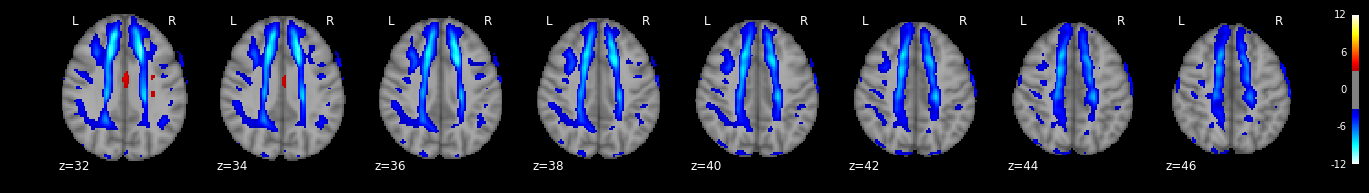

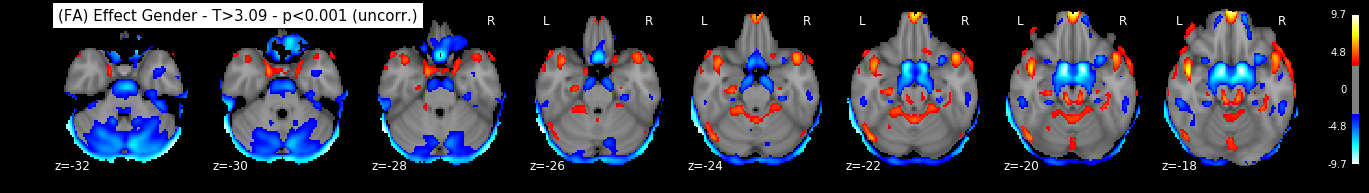

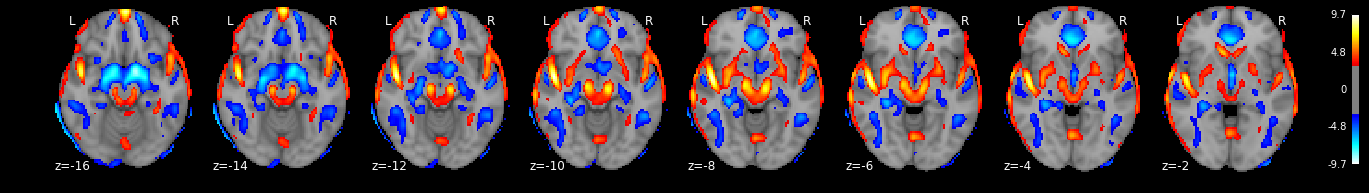

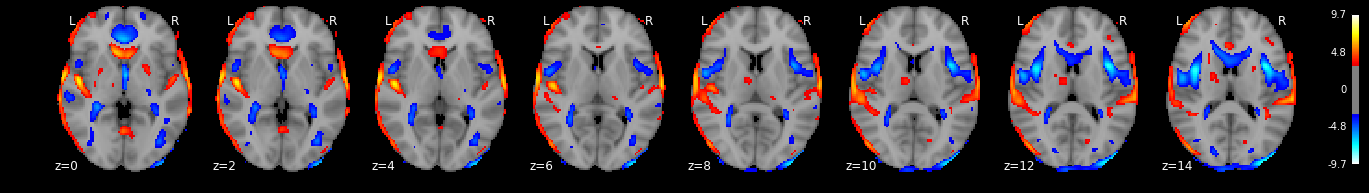

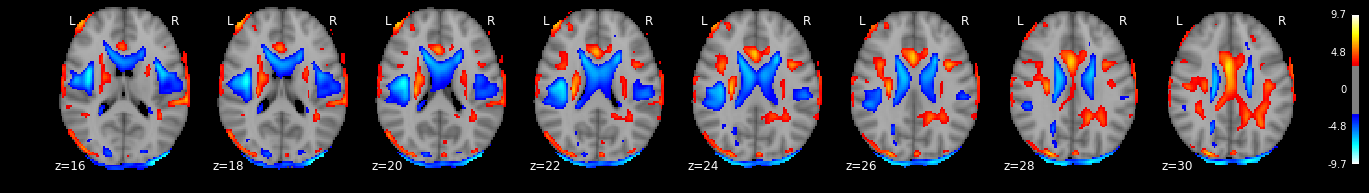

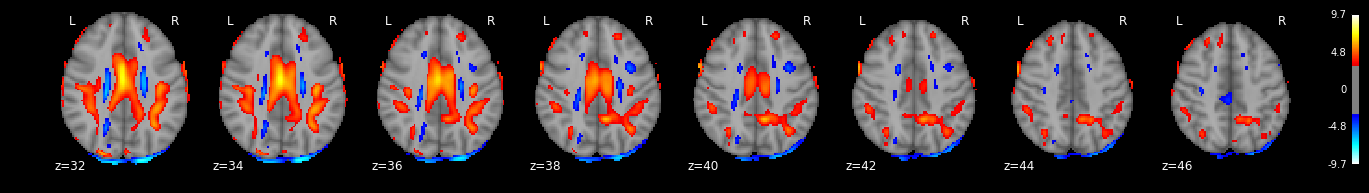

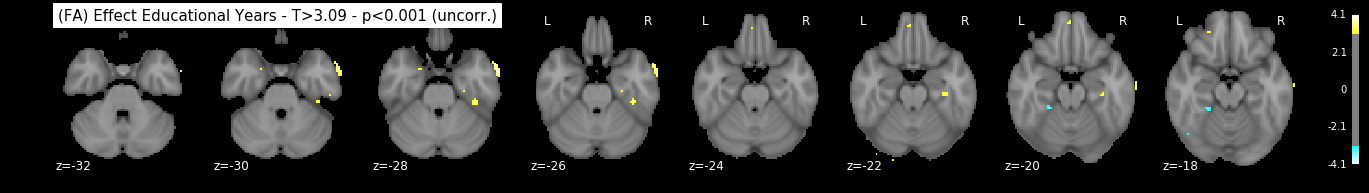

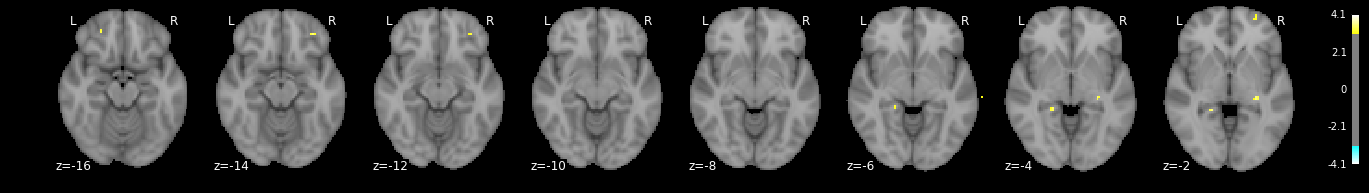

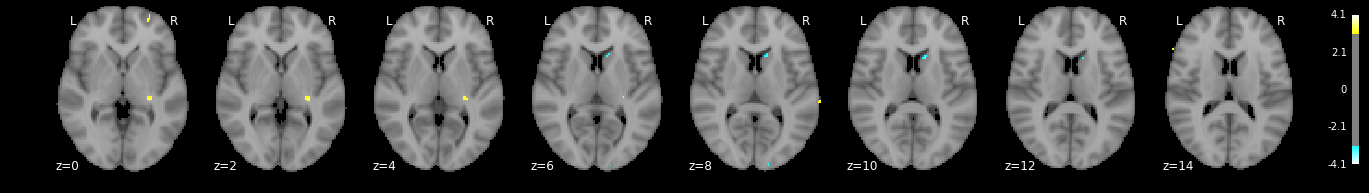

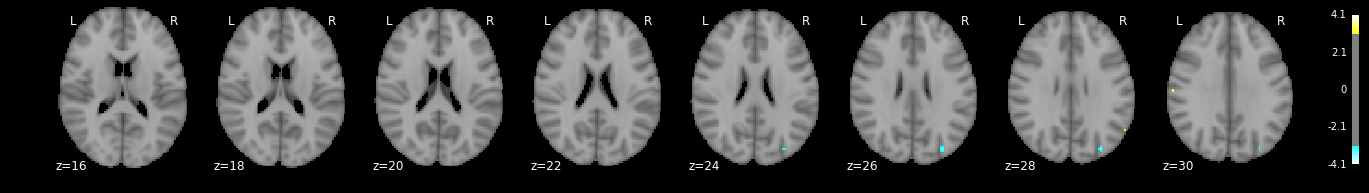

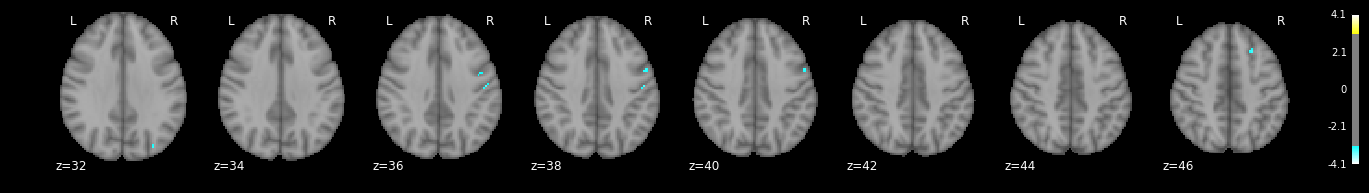

In [20]:
for i in range(1, len(n3.inputs.contrasts)+1):
    img = glob(osp.join(analysis_wd, 'estimatecontrasts/spm*_00%02d.nii'%i))[0]
    contrast_type = osp.split(img)[-1][3]
    print img, contrast_type
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)

    plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - %s>%.02f - p<0.001 (uncorr.)'%(paramtype, contrast_name, contrast_type, threshold1))
        
plotting.show()